# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [12]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df["title_length"] = df["title"].apply(len)
df["title_length"].head(10)

0    24
1    13
2    22
3    15
4    12
5    12
6    30
7    45
8    16
9    10
Name: title_length, dtype: int64

In [3]:
# Calcula media, mediana y moda de la columna 'title_length'
media = np.mean(df["title_length"])
mediana = np.median(df["title_length"])
moda = mode(df["title_length"], keepdims=True).mode[0]

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 15.481103166496425
Mediana: 14.0
Moda: 12


In [4]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = np.max(df["title_length"]) - np.min(df["title_length"])
varianza = np.var(df["title_length"], ddof=1)
desviacion = np.std(df["title_length"], ddof=1)

print(f"Rango: {rango}")
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion}")

Rango: 67
Varianza: 72.1067488840288
Desviación estándar: 8.491569282766807


In [5]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = skew(df["title_length"])
curtosis_val = kurtosis(df["title_length"])

print(f"Asimetría: {asimetria}")
print(f"Curtosis: {curtosis_val}")

Asimetría: 1.5229143965677572
Curtosis: 3.7867237597626007


In [6]:
# Imprime el título más corto y el título más largo según su longitud
titulo_mas_corto = df.loc[df["title_length"].idxmin(), "title"]
titulo_mas_largo = df.loc[df["title_length"].idxmax(), "title"]

print(f"Título más corto: {titulo_mas_corto}")
print(f"Título más largo: {titulo_mas_largo}")

Título más corto: M
Título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


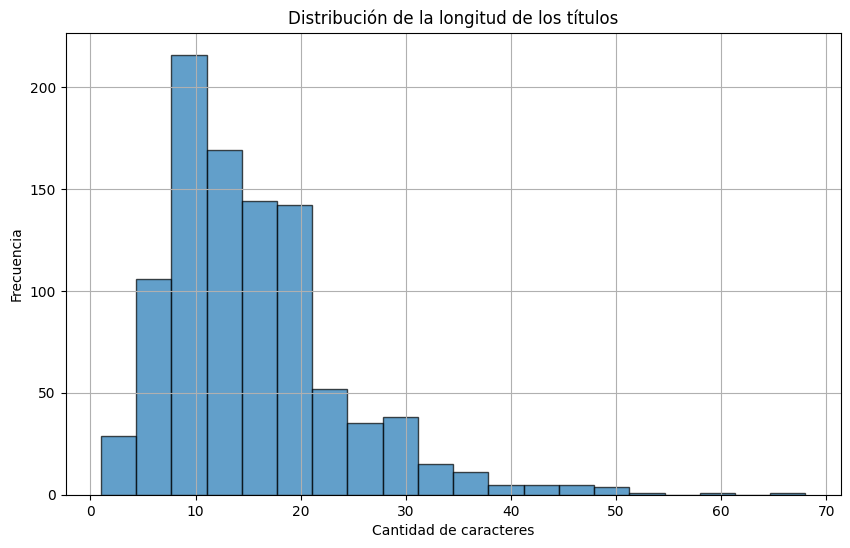

In [7]:
# grafica tus resultados
plt.figure(figsize=(10, 6))
plt.hist(df["title_length"], bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribución de la longitud de los títulos")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [15]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
data = [24, 22, 45, 16, 12]

In [16]:
# Calcula la media de los 5 valores
media_data = sum(data) / len(data)
print(f"Media: {media_data}")

Media: 23.8


In [18]:
# Calcula las diferencias al cuadrado con respecto a la media
suma_diferencias = sum((x - media_data)**2 for x in data)
print(f"Suma de diferencias al cuadrado: {suma_diferencias}")

Suma de diferencias al cuadrado: 652.8000000000001


In [19]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza_manual = suma_diferencias / len(data)
desviacion_manual = varianza_manual ** 0.5

print(f"Varianza: {varianza_manual}")
print(f"Desviación estándar: {desviacion_manual}")

Varianza: 130.56
Desviación estándar: 11.42628548566856
